![](../../CintillaTecNM-ITD.png)

<div style = "Text-align: center">
    <h2> Análisis de datos masivos </h2>
    <h3> Análisis de correlación </h3><br>
    <h3> Nombre docente </h3>
    <h4> Jose Gabriel Rodriguez Rivas <h4>
    <h3> Nombre Alumno </h3>
    <h4> Misael Omar Vargas Ochoa <h4>
</div>

In [2]:
import pandas as pd
brainFile = './brainsize.txt'
brainFrame = pd.read_csv(brainFile)

In [3]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [5]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

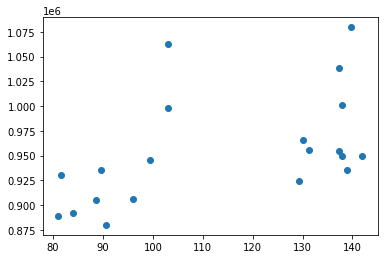

In [9]:
%matplotlib inline
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()

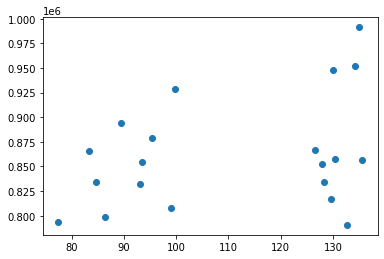

In [10]:
%matplotlib inline
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()

In [11]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


### ¿Por qué la diagonal está plagada de 1? ¿Se trata de una coincidencia?

EL motivo es que se esta evaluando la misma variable

### Los valores debajo de la diagonal 1 tienen valores homólogos duplicados sobre la diagonal 1. ¿Se trata de una coincidencia?

Se trata de una evaluacion repetida de las variables

In [12]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [13]:
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


In [14]:
import seaborn as sns

womenNoGenderDf = womenDf.drop('Gender', axis=1)
menNoGenderDf = menDf.drop('Gender', axis=1)

womenNoGenderDf = womenNoGenderDf[womenNoGenderDf.columns].astype(float)
menNoGenderDf = menNoGenderDf[menNoGenderDf.columns].astype(float)

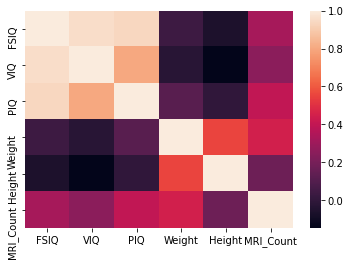

In [16]:
wcorr = womenNoGenderDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

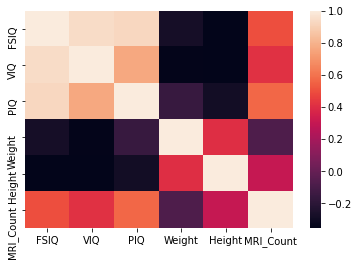

In [17]:
mcorr = menNoGenderDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

### Muchos pares de variables presentan una correlación cercana a cero. ¿Qué significa?
Que existe menor correlación entre las variables

### ¿Por qué se separan los géneros?
Para poder comparar a los hombres y a las mujeres

### ¿Qué variables tienen una correlación más estrecha con el tamaño del cerebro (MRI_Count)? ¿Es eso lo que se espera?
Se tiene una mayor correlacion entre las variables "PIQ", "FSIQ" y "VIQ" de los hombres que en el de las mujeres pero sin embargo sigue siendo un valor muy bajo para considerarla.